<a href="https://colab.research.google.com/github/aquinojoeanson/Capstone_Project_3/blob/main/2_Machine_Learning__NLP_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets:

The Amazon dataset contains the customer reviews from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/

* asin - Unique ID of the product being reviewed, string

* helpful - A list with two elements: the number of users that voted helpful, and the total number of users that voted on the review (including the not helpful votes), list

* overall - The reviewer's rating of the product, int64

* reviewText - The review text itself, string

* reviewerID - Unique ID of the reviewer, string

* reviewerName - Specified name of the reviewer, string

* summary - Headline summary of the review, string

* unixReviewTime - Unix Time of when the review was posted, string
* label - Positive or Negative review

# Import Data #

In [26]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [27]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

The `df` is created from the Amazon dataset. If the file has been downloaded then the dataset is loaded from the local file. Otherwise the file is accessed and extracted directly from the repository.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
import pickle

# For Data Preprocessing
from sklearn.model_selection import train_test_split

# For Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Evaluation
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve, auc
#from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

In [29]:
model_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/modelWV_df.csv")

In [30]:
model_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.042715,0.449554,-0.058469,-0.210948,0.221794,-0.406341,0.152388,0.559175,-0.487808,-0.415364,...,0.763038,0.166407,-0.031325,-0.102957,0.845048,0.180261,0.347787,-0.633866,0.123177,0.221894
1,-0.058009,0.447886,-0.060280,-0.213946,0.239694,-0.400263,0.140340,0.551776,-0.484460,-0.416487,...,0.758032,0.165706,-0.031013,-0.115166,0.828764,0.180414,0.361801,-0.627044,0.112354,0.219076
2,-0.042507,0.462787,-0.075884,-0.228007,0.244245,-0.383637,0.138473,0.547498,-0.502998,-0.400627,...,0.769735,0.175365,-0.023077,-0.118382,0.855374,0.179828,0.377723,-0.637077,0.138037,0.214269
3,-0.051971,0.446820,-0.068522,-0.217371,0.231471,-0.385490,0.139727,0.540269,-0.464324,-0.403209,...,0.731075,0.161128,-0.030951,-0.107705,0.821246,0.169571,0.358834,-0.618393,0.120148,0.203459
4,-0.046612,0.502452,-0.093345,-0.246627,0.276240,-0.374039,0.146505,0.557952,-0.554885,-0.401337,...,0.835133,0.166933,-0.031728,-0.136688,0.906143,0.160617,0.422900,-0.666479,0.145003,0.250361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,-0.011379,0.043020,-0.015185,-0.025008,0.027035,-0.038922,0.006591,0.055197,-0.044675,-0.025160,...,0.074329,0.009090,-0.012181,-0.000119,0.077820,0.004964,0.033461,-0.047496,0.002479,0.020942
1317,-0.011550,0.070581,-0.010208,-0.028667,0.033205,-0.059796,0.016632,0.087615,-0.063119,-0.062340,...,0.111193,0.029710,-0.008286,-0.025582,0.128305,0.029372,0.048299,-0.095341,0.017187,0.038684
1318,-0.003543,0.075218,-0.015888,-0.041589,0.050032,-0.068472,0.024377,0.100150,-0.085863,-0.064179,...,0.124371,0.021849,-0.005672,-0.015688,0.146607,0.034636,0.065529,-0.102869,0.026554,0.042138
1319,-0.001078,0.026155,0.004854,-0.016717,0.025512,-0.035989,0.000948,0.032636,-0.042527,-0.031210,...,0.056084,0.005283,0.000811,-0.012812,0.056309,0.019817,0.027382,-0.035291,0.011894,0.023769


# Machine Learning #
Finalizing the dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

## Dealing with Unbalanced Data ##

In [31]:
nan_list = model_df[model_df.apply(lambda row: any(row.isna()), axis=1)].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[]


In [32]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

In [33]:
for blank in nan_list[0:5]:
    display(df["reviewText"].iloc[blank])

In [34]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")
model_df["label"] = df["overall"]
model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 1321
Final 'model_df' count: 1321


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.042715,0.449554,-0.058469,-0.210948,0.221794,-0.406341,0.152388,0.559175,-0.487808,-0.415364,...,0.166407,-0.031325,-0.102957,0.845048,0.180261,0.347787,-0.633866,0.123177,0.221894,5
1,-0.058009,0.447886,-0.060280,-0.213946,0.239694,-0.400263,0.140340,0.551776,-0.484460,-0.416487,...,0.165706,-0.031013,-0.115166,0.828764,0.180414,0.361801,-0.627044,0.112354,0.219076,1
2,-0.042507,0.462787,-0.075884,-0.228007,0.244245,-0.383637,0.138473,0.547498,-0.502998,-0.400627,...,0.175365,-0.023077,-0.118382,0.855374,0.179828,0.377723,-0.637077,0.138037,0.214269,3
3,-0.051971,0.446820,-0.068522,-0.217371,0.231471,-0.385490,0.139727,0.540269,-0.464324,-0.403209,...,0.161128,-0.030951,-0.107705,0.821246,0.169571,0.358834,-0.618393,0.120148,0.203459,2
4,-0.046612,0.502452,-0.093345,-0.246627,0.276240,-0.374039,0.146505,0.557952,-0.554885,-0.401337,...,0.166933,-0.031728,-0.136688,0.906143,0.160617,0.422900,-0.666479,0.145003,0.250361,1


# Dealing with Unbalanced Data
The distribution of ratings shows that, in general, users highly approve of products bought on Amazon. This however gives us a highly imbalanced dataset.

In [35]:
import os
import pandas as pd

dataset = "reviews_Electronics_5.json"

if os.path.isfile(dataset):
   df = pd.read_json("reviews_Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)


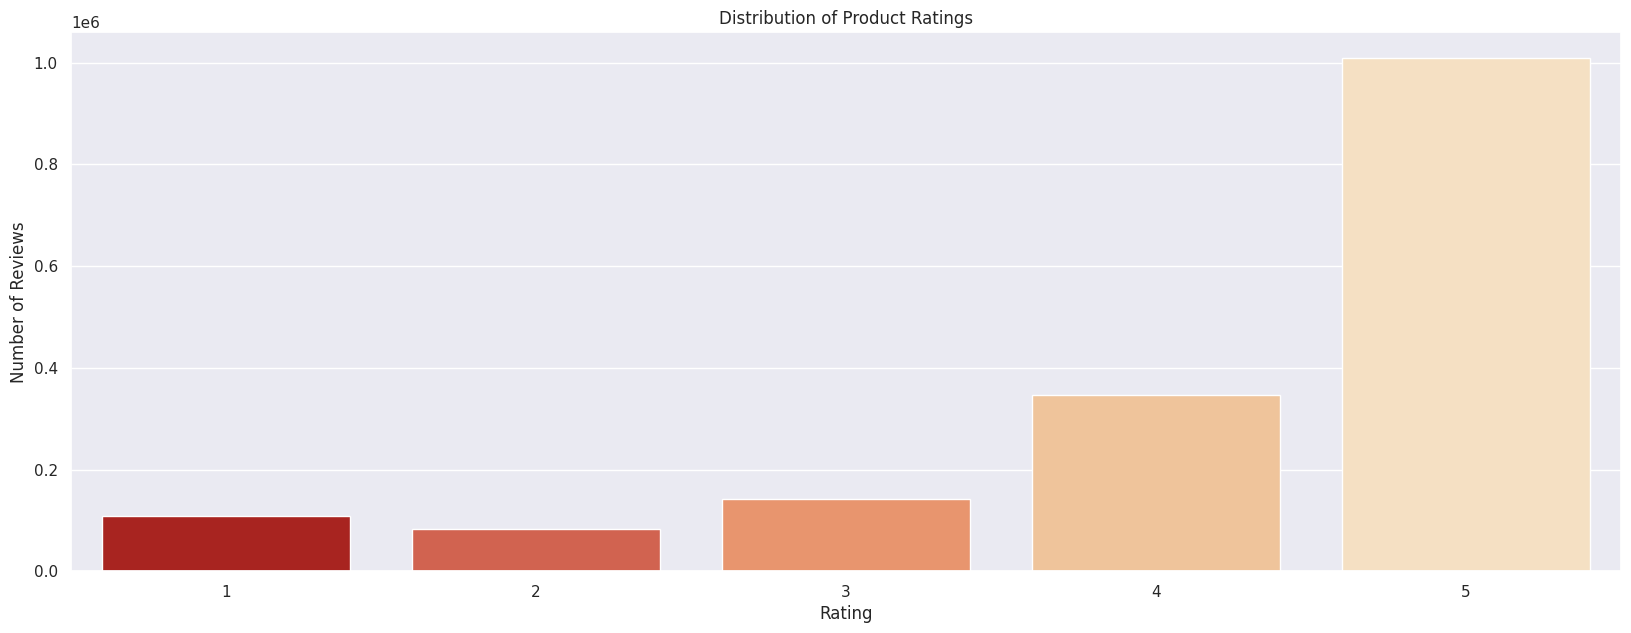

In [36]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

If the model simply classified every review as 5, then an accuracy of around 60% can be achieved given this exact dataset. Since this would outperform predictions made by chance, we should therefore ensure that we stratify the testing set where we base the final score of the model.



In [37]:
majority = df["overall"] == 5
majority_ratio = len(df[majority]) / len(df)

print(f"{majority_ratio*100:.2f}%")

59.73%


To deal with this we will have to take into account underrepresenting the majority and/or overrepresenting the minority.



# Underrepresentation vs. Overrepresentation

In [38]:
count = len(model_df[model_df["label"] == 2])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 58


In choosing this route to deal with imbalance, we create a trimmed version of our dataframe, trimmed_df. Each class is trimmed to have the same number of entries as the smallest class which is Class 2.



In [39]:
#trim the majority class
condition = model_df["label"] == 5
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 58
Size of Class 2: 58
Size of Class 3: 58
Size of Class 4: 58
Size of Class 5: 58


In [40]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
1050,0.000699,0.050801,-0.007640,-0.020605,0.027875,-0.044227,0.014003,0.061989,-0.058402,-0.050306,...,0.026412,0.000057,-0.005457,0.093950,0.014751,0.044110,-0.067104,0.016500,0.030327,1
1270,-0.009076,0.070061,-0.019181,-0.032707,0.043416,-0.058032,0.022613,0.083710,-0.071888,-0.061901,...,0.023245,-0.013416,-0.018816,0.127958,0.035206,0.062381,-0.095601,0.028549,0.026863,1
769,-0.008035,0.098084,-0.009194,-0.049752,0.040142,-0.072858,0.023808,0.116641,-0.095456,-0.082213,...,0.037523,0.003383,-0.015767,0.180837,0.032791,0.072790,-0.125049,0.033037,0.055287,1
414,-0.009816,0.134269,-0.021010,-0.070933,0.076723,-0.119081,0.042901,0.169215,-0.158159,-0.120843,...,0.060132,-0.011876,-0.025164,0.247001,0.044014,0.109633,-0.192012,0.039776,0.062375,1
268,-0.029899,0.206902,-0.030198,-0.103785,0.110495,-0.186218,0.055062,0.251659,-0.235702,-0.199132,...,0.078881,-0.022390,-0.052984,0.392341,0.083370,0.161543,-0.297854,0.058605,0.111468,1


We see that we now have a perfectly balanced dataset after we performed underrepresentation.



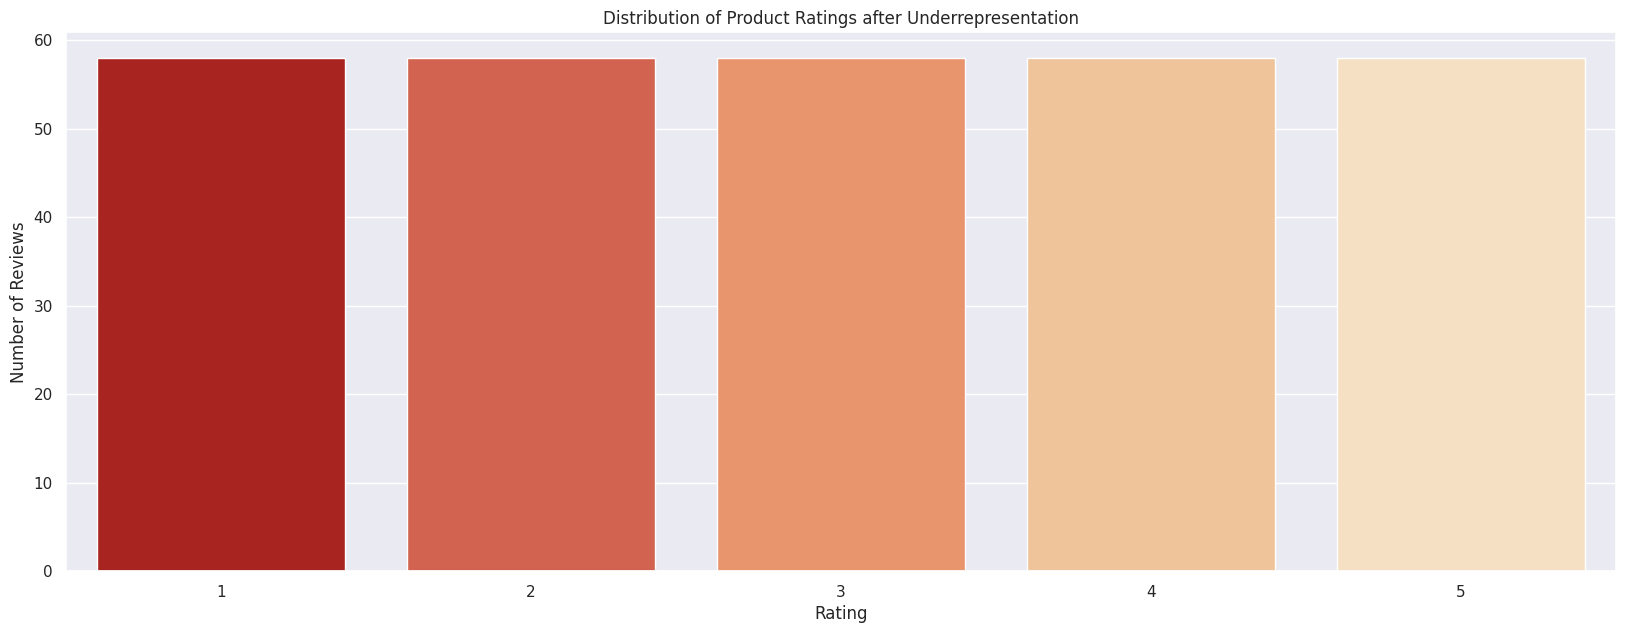

In [41]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

# Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

## Scoring and Baseline

In [43]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 20.000%
Baseline F1 Score: 0.200


## Random Forest

In [44]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)


In [45]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={1:10, 2:12, 3:7, 4:9, 5:1}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

CPU times: user 213 ms, sys: 3.58 ms, total: 216 ms
Wall time: 216 ms


RandomForestClassifier(class_weight={1: 10, 2: 12, 3: 7, 4: 9, 5: 1},
                       criterion='entropy', n_estimators=25, random_state=42)

In [46]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.697%
Training Set F1 Score: 0.997


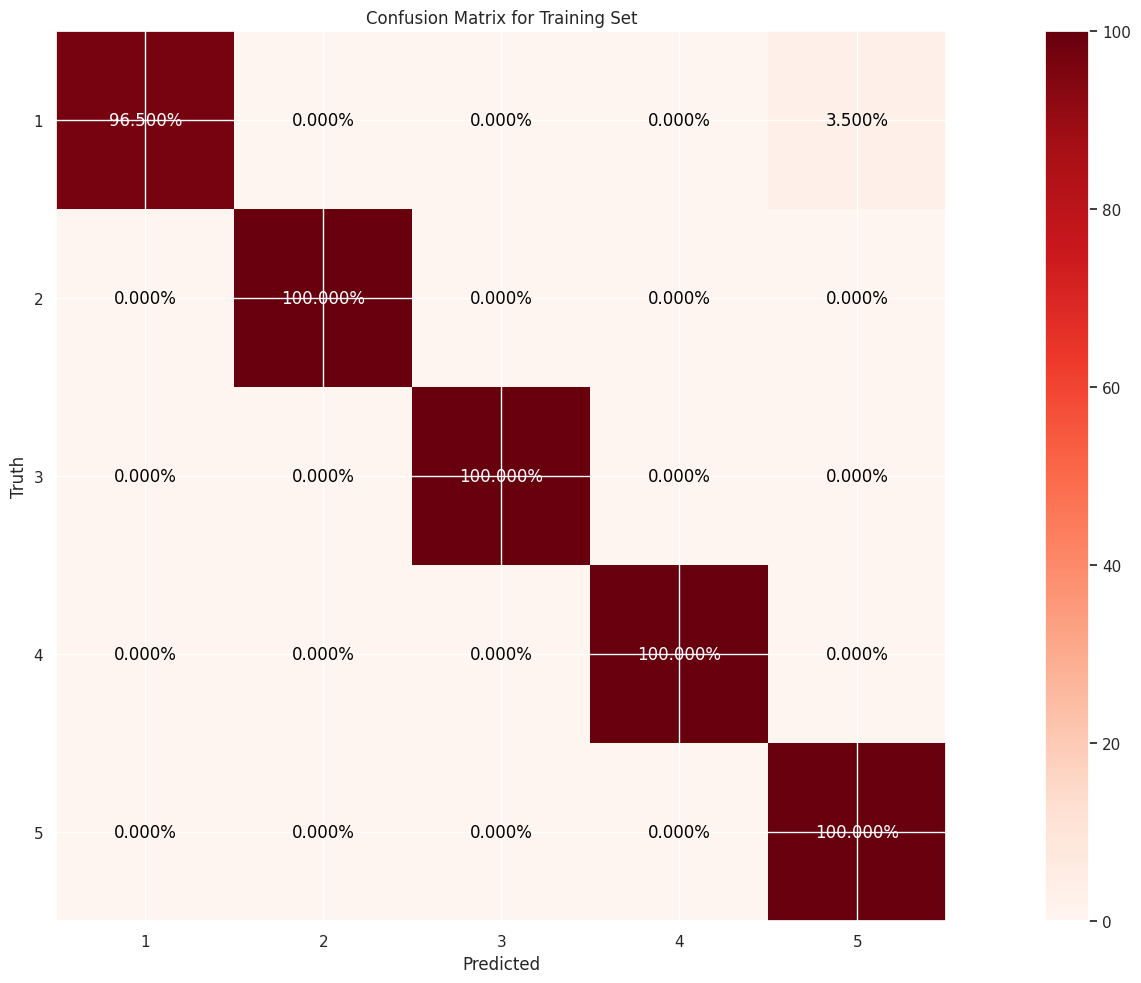

In [47]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

## Cross-Validation ##


In [48]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 56.212%
Training Set F1 Score: 0.562


## XGBoost ##

In [49]:
%%time
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

[18:25:37] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

CPU times: user 11.9 s, sys: 47.4 ms, total: 11.9 s
Wall time: 1.58 s


In [50]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 100.000%
Training Set F1 Score: 1.000


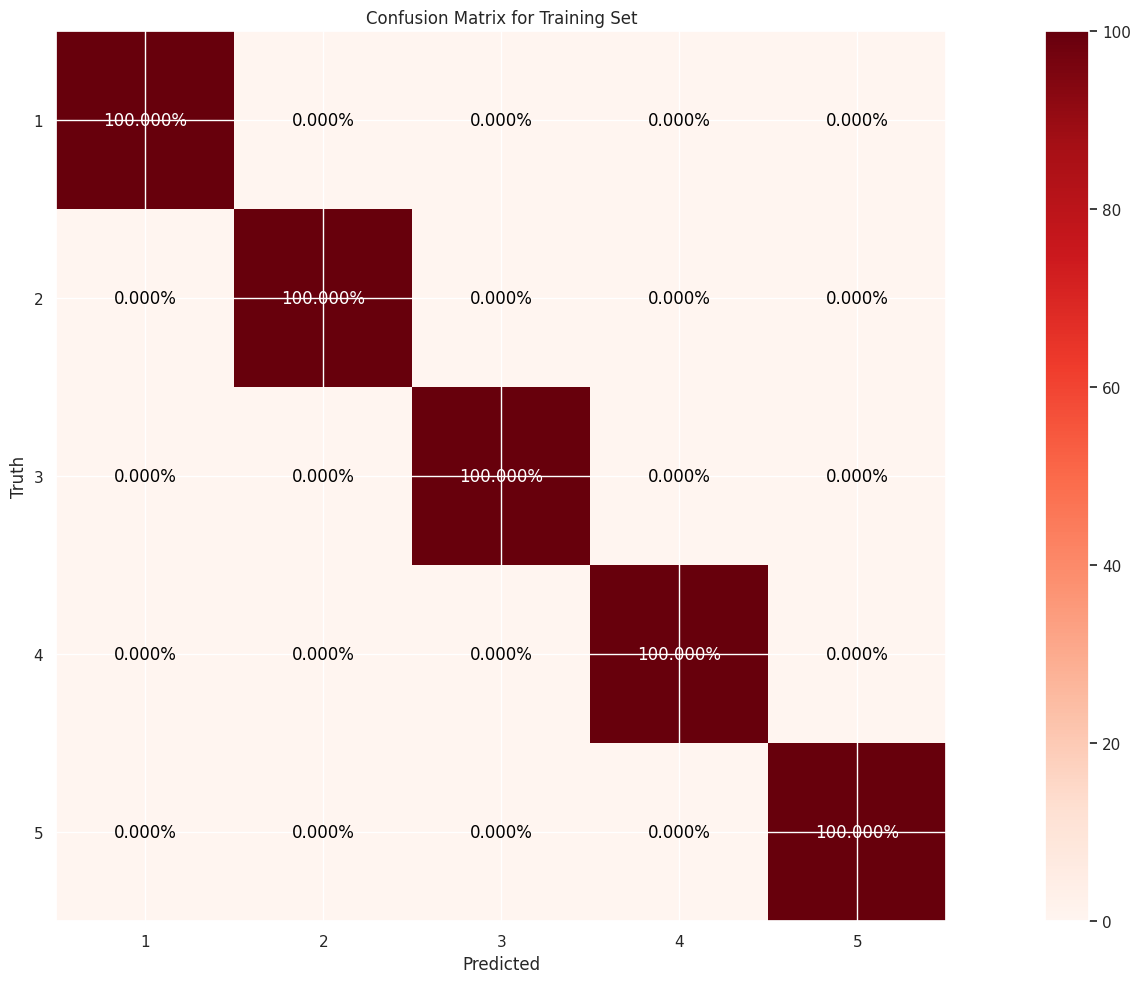

In [51]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [52]:
%%time
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

[18:25:39] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:25:39] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[18:25:39] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.100758,0.011930,0.527273,0.019639
1,0.043939,0.005965,0.503030,0.025263
2,0.027273,0.007423,0.484848,0.011930
3,0.014394,0.005965,0.484848,0.017142
4,0.009091,0.008504,0.468182,0.028987


CPU times: user 14 s, sys: 41.6 ms, total: 14.1 s
Wall time: 1.79 s


Final boosting phase. The merror is an accuracy error rate metric meant for multi-class labels.

We can get a sense of how accurate the model is by subtracting the merror value from a perfect score of 100%.



In [53]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 57.727%


# Final Scores ##

In [54]:
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 55.068%
Test Set F1 Score: 0.551


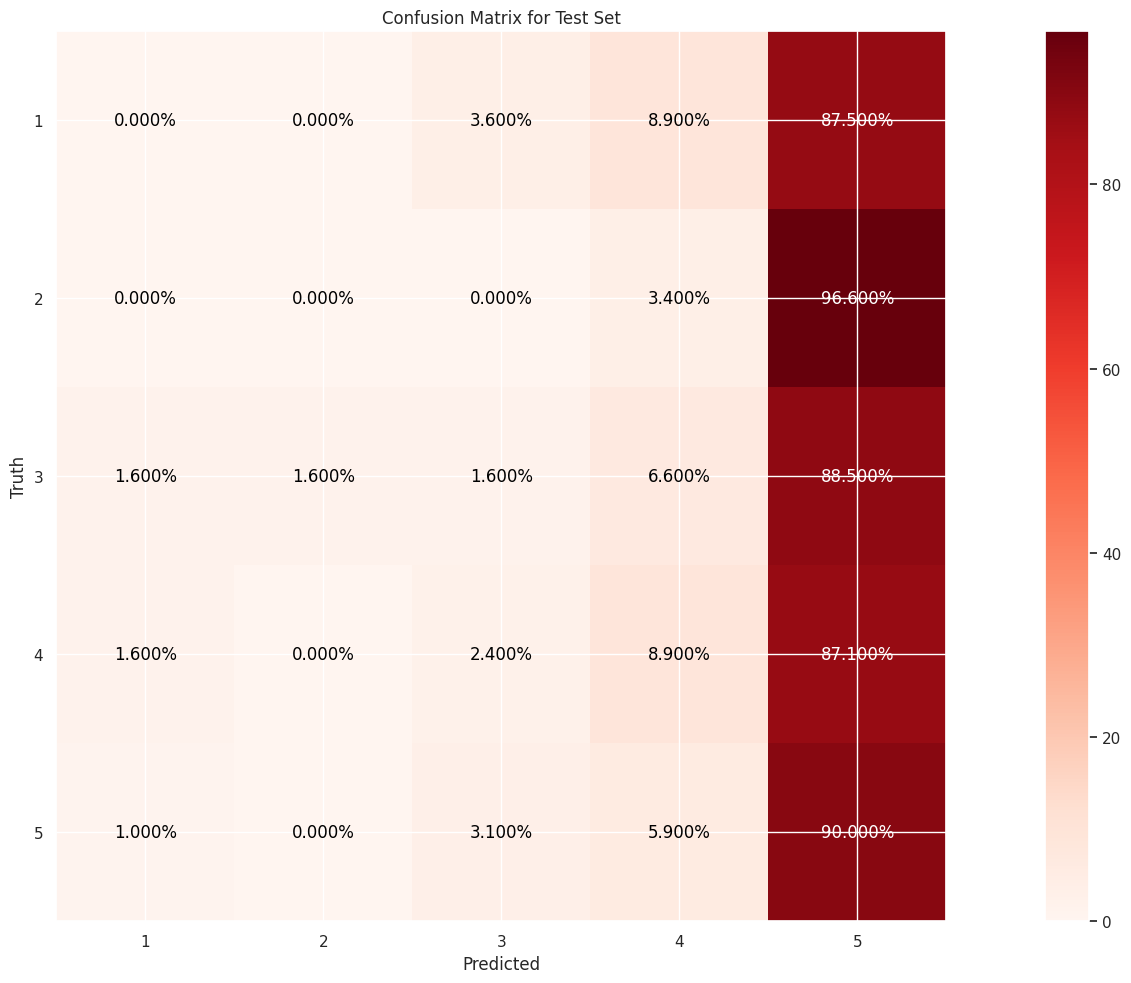

In [55]:
#create the confusion matrix of the test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

Our results above were actually based on the original model_df dataset that had the massive class imbalance. Let's now reassign our X and y variables to the balanced trimmed_df sample dataset we've created.



In [56]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [57]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

Balanced Test Set Accuracy: 69.655%
Balanced Test Set F1 Score: 0.697


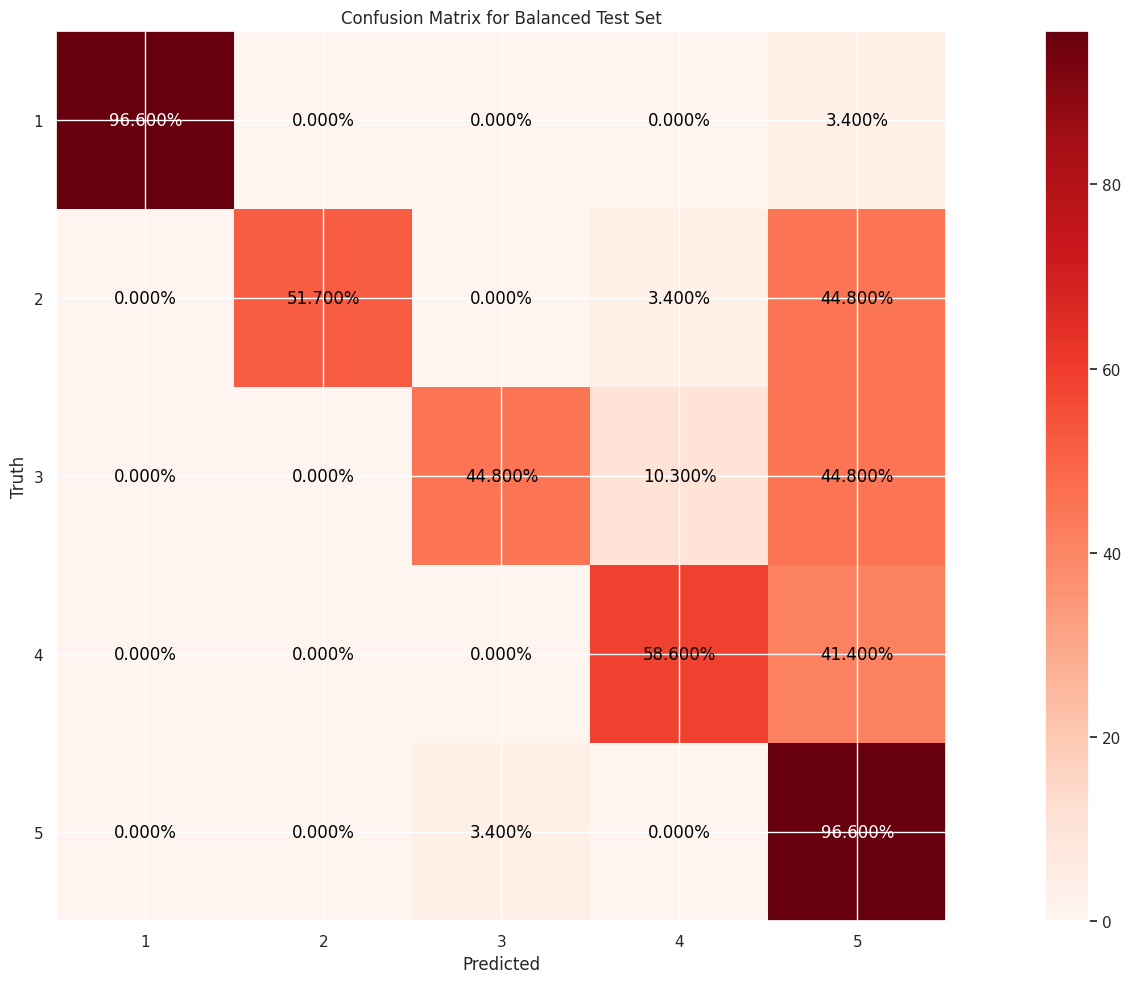

In [58]:
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

At 69.655% on a perfectly balanced training data set, we have achieved a better result compared to the 20% accuracy of our baseline.

## Word Cloud ##


In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

#remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
 #                                         if token not in stop_words])
#df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

#print(df["preprocessed"].iloc[499])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We see that some of the words are quite descriptive of the rating, with "problem" and "issue" frequently appearing in one-star reviews, and "quality" and "highly recommend" in top reviews.

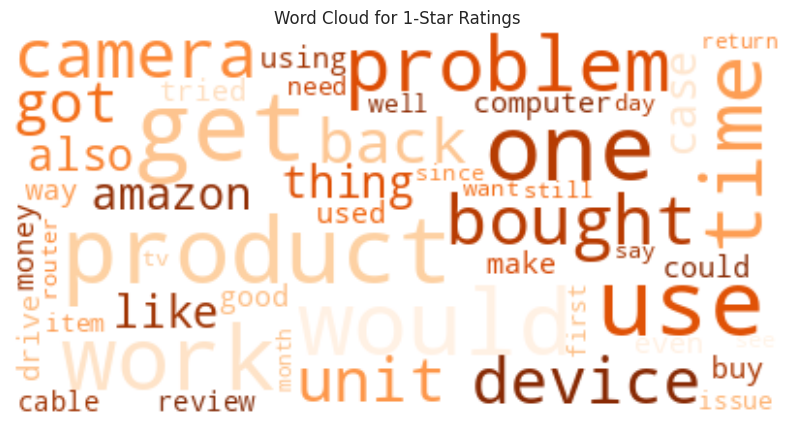

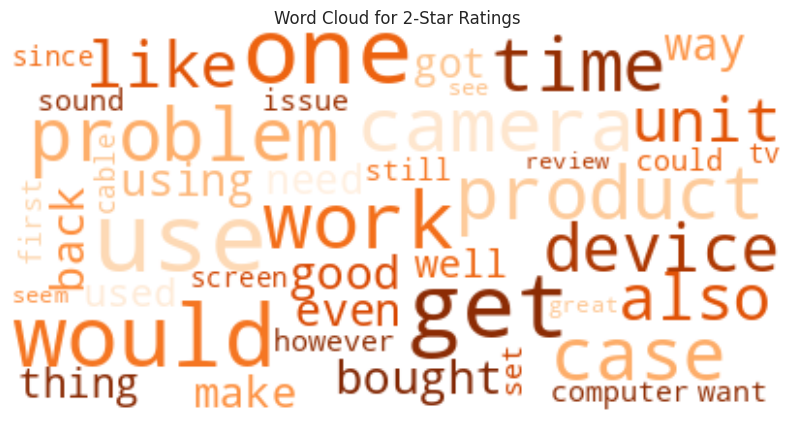

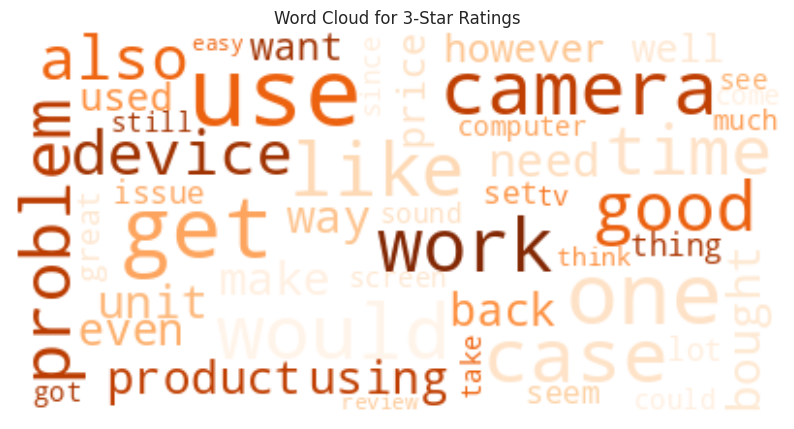

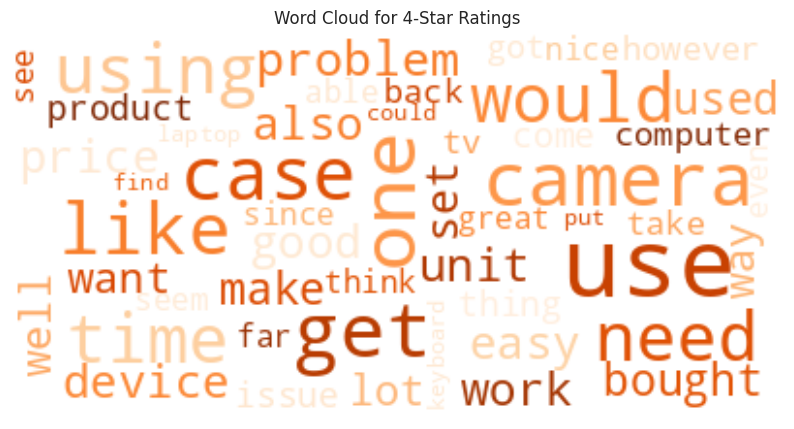

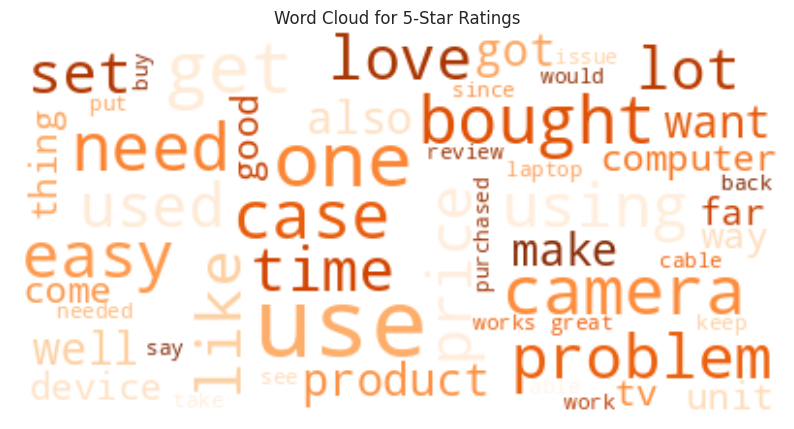

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(df[df["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(df[df["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(df[df["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(df[df["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()